# import 

In [1]:
from cov.covSum import covSum
from cov.covSEard import covSEard
from cov.covNoise import covNoise
from lik.loglikelihood import loglikelihood
import numpy as np
from scipy.optimize import minimize
from local_linearfit import local_linearfit
from calculate_gx import calculate_gx
from maximize_PD import maximize_PD
from JumpGP_LD import JumpGP_LD
from simulate_case import simulate_case

import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from skimage import measure

In [2]:
y = np.random.rand(5, 1)
y

array([[0.46580639],
       [0.54375783],
       [0.03625517],
       [0.21676809],
       [0.99111089]])

# data generation

In [4]:
loghyper = np.array([ 1.07160318,0.47091217,-1.3225513,-1.12983861,5])
x = np.array([[1.20663103, 2.06896326, 0.81121173],
              [-0.91507893, 1.82804932, -0.57245283],
              [-0.15962585, -0.71187307, -0.21697617],
              [0.24503187, 0.26066701, -1.0035294],
              [-1.48781972, -1.05787692, -0.17660721]])

z = np.array([[0.10125506, 0.48125236, 1.08439458],
              [2.24963887, -1.26946239, -1.38533352],
              [0.85889631, -1.45310838, 0.25771964],
              [-1.7467173, 0.30137992, 0.87534816]])
y = np.array([[0.44464869],
       [0.00961669],
       [0.83954647],
       [0.065795  ],
       [0.66915748]])
# covNoise(loghyper, x, 1)

In [5]:
# test sq_dist
import numpy as np
a = np.array([[ 0.25903865,  0.31306065, -1.15598174,  0.99072761, -1.32016278],
 [-1.30192679, -1.57205916,  1.39791904,  0.31796323, -0.23612809],
 [-0.60551855,  0.16873188, -0.84142728,  0.33235275,  0.85889901],
 [-0.42114252,  2.08631723,  0.68038556,  0.3891035 ,  0.49618429]])
b = np.array([[-0.93938823,  0.57699803, -1.53625711,  0.78658444, -1.84761247,  0.82575864],
 [-0.00366112, -1.15524271,  0.50133093, -0.3120692 , -1.03505102,  0.56341386],
 [-0.55393028, -1.12327986, -1.38202594,  0.9614004 , -0.11471635,  0.91662938],
 [-0.98173329,  0.38871642,  1.12640807, -0.60718787, -1.03781187, -0.6775957 ]])
Q = np.array([[ 1.09937429, -0.44825199, -1.11177016, -1.14566427, -0.01635297, -0.97182717],
 [ 1.56652462,  1.19099735, -0.43719879,  1.44931222, -0.53721698,  2.46452119],
 [ 0.8183128 , -0.40648116, -0.09076264,  0.01602344,  0.04018956,  0.11369391],
 [-0.7141464 ,  1.0681882 ,  0.10476072,  0.20973321, -1.06478112, -0.27394617],
 [ 1.08310582,  0.43906602, -1.13341128,  0.28604578,  0.02441914,  0.47179674]])

from cov.sq_dist import sq_dist
sq_dist(a,b,Q)

array([-9.16469727,  9.03479284, -1.41166437, 41.13526925])

In [2]:
import numpy as np

# Set the random seed for reproducibility
np.random.seed(42)

# Sample sizes
n_train = 10  # Number of training samples
n_test = 3   # Number of test samples
d = 3        # Number of dimensions

# Generate random training inputs (x) and responses (y)
x = np.random.randn(n_train, d)  # Training inputs: shape (n_train, d)
y = np.random.randn(n_train, 1)   # Training responses: shape (n_train, 1)

# Generate random test inputs (xt)
xt = np.random.randn(n_test, d)    # Test inputs: shape (n_test, d)

# Print the generated data
print("Training Inputs (x):")
print(x)
print("\nTraining Responses (y):")
print(y)
print("\nTest Inputs (xt):")
print(xt)

Training Inputs (x):
[[ 0.49671415 -0.1382643   0.64768854]
 [ 1.52302986 -0.23415337 -0.23413696]
 [ 1.57921282  0.76743473 -0.46947439]
 [ 0.54256004 -0.46341769 -0.46572975]
 [ 0.24196227 -1.91328024 -1.72491783]
 [-0.56228753 -1.01283112  0.31424733]
 [-0.90802408 -1.4123037   1.46564877]
 [-0.2257763   0.0675282  -1.42474819]
 [-0.54438272  0.11092259 -1.15099358]
 [ 0.37569802 -0.60063869 -0.29169375]]

Training Responses (y):
[[-0.60170661]
 [ 1.85227818]
 [-0.01349722]
 [-1.05771093]
 [ 0.82254491]
 [-1.22084365]
 [ 0.2088636 ]
 [-1.95967012]
 [-1.32818605]
 [ 0.19686124]]

Test Inputs (xt):
[[ 0.73846658  0.17136828 -0.11564828]
 [-0.3011037  -1.47852199 -0.71984421]
 [-0.46063877  1.05712223  0.34361829]]


In [2]:
import numpy as np

# 随机生成 Training Inputs (x)
n = 10  # 行数
D = 3  # 列数
n_test = 1

x = np.random.randn(n, D)  # 生成 n x D 的随机矩阵
x0 = np.random.randn(n_test, D)

# 随机生成 Target Outputs (y)
y = np.random.randn(n, 1)  # 生成 n 行 1 列的随机列向量

# 随机生成 logtheta
logtheta = np.random.randn(D+2)  # 生成 D+1 维的随机向量
loglike = loglikelihood(logtheta, covSum, [covSEard, covNoise], x, y)
print(f"***loglike:{loglike}")

# 转换为 MATLAB 赋值语句
x_matlab = '\n'.join([' '.join(map(str, row)) for row in x])
y_matlab = '\n'.join(map(str, y.flatten()))
x_test_matlab = '\n'.join([' '.join(map(str, row)) for row in x0])
logtheta_matlab = ';\n'.join(map(str, logtheta))

print("MATLAB 赋值语句：")
print(f"x = [{x_matlab}];")
print(f"y = [{y_matlab}];")
print(f"x0 = [{x_test_matlab}];")
print(f"logtheta = [{logtheta_matlab}];")
print(f"loglike = loglikelihood(logtheta, cv,x,y);")


***loglike:15.76517263265641
MATLAB 赋值语句：
x = [-0.03284968102265969 0.22168006545604266 0.22256190177277907
0.7477727041495159 0.23961765612325422 0.3271053493234456
0.9265275091075564 1.1989001477885053 0.536974855517267
0.4942480206823471 0.11027629916916146 0.5409408595786026
-1.6629750182987126 -0.6169951027559407 1.3926852787998183
-0.9582182153899916 1.213338311276979 -1.51142330462067
-0.33577322629109974 -0.7638737681747826 -0.2712502675951562
1.922504256962363 0.3680281617171756 0.41819192302134234
-0.1509628509472727 0.7506429120256519 -1.3214887317198702
-0.6562516157480693 -0.5629556148801506 -0.9146246713005229];
y = [0.754162615740451
0.3550132778340885
-0.014724329107544645
-0.7644879384700786
-0.6534242508587528
0.16155886290652124
-0.9065585616003766
-0.2408172920297462
-0.46122134896885847
-1.0788763281154703];
x0 = [0.9123553576991795 0.4026046107309493 0.04987034743807543];
logtheta = [-1.5001175692338513;
-0.6995721991081609;
0.0024850873181781023;
0.34947933853438

In [2]:
def print_mat(data):
    for name, value in data.items():
        if len(value.shape) == 2 and value.shape[1] == 1:
            value_matlab = '\n'.join(map(str, value.flatten()))
        else:
            value_matlab = '\n'.join([' '.join(map(str, row)) for row in value])
        print(f"{name} = [{value_matlab}];")

# test codes

## covSEard

In [3]:
# test covSEard
import numpy as np
from cov.covSEard import covSEard

# 假设的超参数(log(ell_1), ..., log(ell_D), log(sqrt(sf2)))
D = 3  # 维度
loghyper = np.random.randn(D + 1)  # 超参数维度为D+1

# 生成输入数据矩阵 x (n x D)
n = 5  # 输入数据点的数量
x = np.random.randn(n, D)  # 生成随机的 n x D 数据

# 生成测试数据矩阵 z (m x D)
m = 4  # 测试数据点的数量
z = np.random.randn(m, D)  # 生成随机的 m x D 测试数据

# 运行 covSEard 函数，并打印结果
def test_covSEard():
    print("Running covSEard function with loghyper:", loghyper)
    print("Input data matrix x:", x)
    print("Test set data matrix z:", z)

    # 测试 Step 1: 返回超参数数量
    print("Number of hyperparameters (Step 1):", covSEard(loghyper, None))

    # 测试 Step 2: 计算协方差矩阵 (z 不提供)
    K = covSEard(loghyper, x)
    print("Covariance matrix K (Step 2):\n", K)

    # 测试 Step 3: 计算测试集的协方差矩阵
    A, B = covSEard(loghyper, x, z)
    print("Variance for test set A (Step 3):\n", A)
    print("Cross-covariance matrix B (Step 3):\n", B)

    # 测试 Step 4: 计算导数矩阵
    for i in range(1, D+2):  # z 的范围是 1 到 D+1
        A = covSEard(loghyper, x, i)
        print(f"Derivative matrix A for z={i} (Step 4):\n", A)

test_covSEard()


Running covSEard function with loghyper: [ 1.07160318  0.47091217 -1.3225513  -1.12983861]
Input data matrix x: [[ 1.20663103  2.06896326  0.81121173]
 [-0.91507893  1.82804932 -0.57245283]
 [-0.15962585 -0.71187307 -0.21697617]
 [ 0.24503187  0.26066701 -1.0035294 ]
 [-1.48781972 -1.05787692 -0.17660721]]
Test set data matrix z: [[ 0.10125506  0.48125236  1.08439458]
 [ 2.24963887 -1.26946239 -1.38533352]
 [ 0.85889631 -1.45310838  0.25771964]
 [-1.7467173   0.30137992  0.87534816]]
Number of hyperparameters (Step 1): (D+1)
Covariance matrix K (Step 2):
 [[1.04384173e-01 1.10536433e-07 1.21058727e-05 4.42310192e-12
  1.05071893e-05]
 [1.10536433e-07 1.04384173e-01 1.17869079e-02 1.61437193e-02
  6.69669878e-03]
 [1.21058727e-05 1.17869079e-02 1.04384173e-01 1.10203342e-03
  9.09050948e-02]
 [4.42310192e-12 1.61437193e-02 1.10203342e-03 1.04384173e-01
  5.05314853e-04]
 [1.05071893e-05 6.69669878e-03 9.09050948e-02 5.05314853e-04
  1.04384173e-01]]
Variance for test set A (Step 3):
 [[

In [2]:
import numpy as np
from cov.covNoise import covNoise
loghyper = np.array([ 1.07160318,0.47091217,-1.3225513,-1.12983861,2])
x = np.array([[1.20663103, 2.06896326, 0.81121173],
              [-0.91507893, 1.82804932, -0.57245283],
              [-0.15962585, -0.71187307, -0.21697617],
              [0.24503187, 0.26066701, -1.0035294],
              [-1.48781972, -1.05787692, -0.17660721]])

z = np.array([[0.10125506, 0.48125236, 1.08439458],
              [2.24963887, -1.26946239, -1.38533352],
              [0.85889631, -1.45310838, 0.25771964],
              [-1.7467173, 0.30137992, 0.87534816]])
# covNoise(loghyper, x, 1)

## covSum, loglikelihood

In [10]:
s2 = np.exp(2 * loghyper)
A = 2 * np.dot(s2, np.eye(x.shape[0]))
A

array([ 17.05346725,   5.12931192,   0.14199614,   0.20876834,
       109.19630007])

In [9]:
s2*np.eye(x.shape[0])

array([[ 8.52673362,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  2.56465596,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.07099807,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.10438417,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        , 54.59815003]])

In [1]:
covSum([covSEard, covNoise])

'(D+1)+1'

In [9]:
covfunc = [covSEard, covNoise]
v = []
x = np.array([[1.20663103, 2.06896326, 0.81121173],
              [-0.91507893, 1.82804932, -0.57245283],
              [-0.15962585, -0.71187307, -0.21697617],
              [0.24503187, 0.26066701, -1.0035294],
              [-1.48781972, -1.05787692, -0.17660721]])
n, D = x.shape
for i, func in enumerate(covfunc):
    param_count = eval(func())  # Assuming func returns the number of parameters it needs
    print(param_count)
    v.extend([i+1] * param_count)

4
1


In [7]:
res = covSum([covSEard, covNoise], loghyper, x, 2)
res = np.round(res, 4)
res

array([[0.    , 0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.0296, 0.0155, 0.0217],
       [0.    , 0.0296, 0.    , 0.0004, 0.0042],
       [0.    , 0.0155, 0.0004, 0.    , 0.0003],
       [0.    , 0.0217, 0.0042, 0.0003, 0.    ]])

In [7]:
loglike, dloglike = loglikelihood(loghyper, covSum, [covSEard, covNoise], x, y, 2)

In [8]:
loglike, dloglike

(29.594735265959667,
 array([-7.31599687e-12, -2.54548921e-11, -8.17691216e-12, -7.31599687e-12,
         4.99991480e+00]))

## minimize, localGP

In [2]:
import numpy as np

# Training Inputs (x)
x = np.array([[0.49671415, -0.1382643,  0.64768854],
              [1.52302986, -0.23415337, -0.23413696],
              [1.57921282,  0.76743473, -0.46947439],
              [0.54256004, -0.46341769, -0.46572975],
              [0.24196227, -1.91328024, -1.72491783]])

# Training Responses (y)
y = np.array([[-0.56228753],
              [-1.01283112],
              [0.31424733],
              [-0.90802408],
              [-1.4123037]])

# Test Inputs (xt)
xt = np.array([[1.46564877, -0.2257763,  0.0675282],
               [-1.42474819, -0.54438272,  0.11092259],
               [-1.15099358,  0.37569802, -0.60063869]])


In [32]:
d = x.shape[1]  # Number of input dimensions
logtheta0 = -np.ones(d + 2)
logtheta0[-1] = -1.15  # Set last element
nIter=100
res = minimize(loglikelihood, logtheta0, args=(covSum, [covSEard, covNoise], x, y), options={'maxiter': nIter})
logtheta = res.x
logtheta, loglikelihood(logtheta, covSum, [covSEard, covNoise], x, y)

(array([-1.60051223, -1.43325631, -4.6219148 , -1.22132937, -0.24714975]),
 37.15202378490393)

In [33]:
logtheta = np.array([9.4020, -0.6285, 0.4536, -0.1519, -9.9082])
loglikelihood(logtheta, covSum, [covSEard, covNoise], x, y)

4.715489363713786

In [23]:
logtheta0

array([-1.  , -1.  , -1.  , -1.  , -1.15])

In [3]:
from LocalGP import LocalGP
LocalGP(x,y,xt)

(array([[-0.75596461],
        [-1.0314143 ],
        [-0.14834665]]),
 array([[0.05024828],
        [0.05439736],
        [0.05608639]]),
 {'covfunc': [<function cov.covSum.covSum(covfunc, logtheta=None, x=None, z=None)>,
   [<function cov.covSEard.covSEard(loghyper=None, x=None, z=None)>,
    <function cov.covNoise.covNoise(logtheta=None, x=None, z=None)>]],
  'logtheta': array([ 7.7467721 ,  0.52669   , 12.23026649,  0.08505115, -1.63115764]),
  'x': array([[ 0.49671415, -0.1382643 ,  0.64768854],
         [ 1.52302986, -0.23415337, -0.23413696],
         [ 1.57921282,  0.76743473, -0.46947439],
         [ 0.54256004, -0.46341769, -0.46572975],
         [ 0.24196227, -1.91328024, -1.72491783]]),
  'y': array([[-0.56228753],
         [-1.01283112],
         [ 0.31424733],
         [-0.90802408],
         [-1.4123037 ]]),
  'xt': array([[ 1.46564877, -0.2257763 ,  0.0675282 ],
         [-1.42474819, -0.54438272,  0.11092259],
         [-1.15099358,  0.37569802, -0.60063869]]),
  'L': 

In [5]:
logtheta = loghyper
K = covSum([covSEard, covNoise], logtheta, x)

In [5]:
s2=np.array([1])
print(s2.shape)
s2=s2.item()
print(s2)

(1,)
1


In [18]:
d = x.shape[1]  # Number of input dimensions
logtheta0 = -np.ones(d + 2)
logtheta0[-1] = -1.15  # Set last element

# Optimize log likelihood
nIter = 100
res = minimize(lambda logtheta: loglikelihood(logtheta, covSum, [covSEard, covNoise], x, y), logtheta0,
               options={'maxiter': 1000})

In [49]:
res = minimize(lambda logtheta: -loglikelihood(logtheta, covSum, [covSEard, covNoise], x, y), logtheta0, 
               options={'maxiter': 100})
res.x

array([ -0.36628323,   1.46074468,  -2.93212683, -69.75707752,
       -52.45786309])

In [51]:
loglikelihood(res.x, covSum, [covSEard, covNoise], x, y)

315934199.62900555

In [7]:
res = minimize(loglikelihood, logtheta0, args=(covSum, [covSEard, covNoise], x, y), options={'maxiter': 100})
res.x, loglikelihood(res.x, covSum, [covSEard, covNoise], x, y)

(array([-1.59228040e+00,  4.87919213e+02, -2.71275971e-01,  8.51975138e-02,
        -8.72695391e+00]),
 14.396296772672539)

In [59]:
logtheta = np.array([-0.0046, -1.1644, 3.5451, -0.1352, -2.3868])
loglikelihood(logtheta, covSum, [covSEard, covNoise], x, y)

10.535499848415125

In [7]:
logtheta = np.array([3.6143, -0.6257, 0.4568, -0.1513, -4.2753])

K = covSum([covSEard, covNoise], logtheta, x)  # K = feval(cv{:}, logtheta, x)
Ktt, Kt = covSum([covSEard, covNoise], logtheta, x, xt)  # Ktt, Kt = feval(cv{:}, logtheta, x, xt)

# Cholesky decomposition
L = np.linalg.cholesky(K)  # Lower triangular matrix
# model['L'] = L

# Compute mean and variance
Ly = np.linalg.solve(L, y)  # L \ y
LK = np.linalg.solve(L, Kt)  # L \ Kt
mu_t = LK.T @ Ly
sig2_t = Ktt - np.sum(LK.T**2, axis=1)

# Compute negative log likelihood
nll = loglikelihood(logtheta, covSum, [covSEard, covNoise], x, y) / x.shape[0]

In [8]:
sig2_t

array([[0.00348775, 0.05982177, 0.14444216],
       [0.00348775, 0.05982177, 0.14444216],
       [0.00348775, 0.05982177, 0.14444216]])

array([[ 1.49014245, -0.4147929 ,  1.94306562],
       [ 4.56908958, -0.70246011, -0.70241088],
       [ 4.73763846,  2.30230419, -1.40842317],
       [ 1.62768012, -1.39025307, -1.39718925],
       [ 0.72588681, -5.73984072, -5.17475349]])

In [9]:
covSum([covSEard, covNoise], logtheta, x, xt)

(array([[0.73908802],
        [0.73908802],
        [0.73908802]]),
 array([[6.81251986e-01, 5.22068584e-01, 3.40365792e-01],
        [7.25442659e-01, 6.07851816e-01, 3.74522917e-01],
        [1.24381431e-01, 3.40188948e-02, 5.61614685e-01],
        [6.32149697e-01, 6.82396093e-01, 2.14850336e-01],
        [2.67426374e-03, 1.42028856e-02, 6.04747405e-05]]))

In [11]:
t1 = np.sum(LK.T**2, axis=1)
t1.shape

(3,)

In [12]:
Ktt-t1

array([[0.00348775, 0.05982177, 0.14444216],
       [0.00348775, 0.05982177, 0.14444216],
       [0.00348775, 0.05982177, 0.14444216]])

In [14]:
K=covSum([covSEard, covNoise], logtheta, x)
np.round(K,4)

array([[0.7391, 0.6219, 0.1371, 0.479 , 0.001 ],
       [0.6219, 0.7391, 0.1266, 0.6666, 0.0034],
       [0.1371, 0.1266, 0.7391, 0.0523, 0.    ],
       [0.479 , 0.6666, 0.0523, 0.7391, 0.0136],
       [0.001 , 0.0034, 0.    , 0.0136, 0.7391]])

In [15]:
K.shape

(5, 5)

In [25]:
LocalGP(x,y,xt)

(array([[-0.06649729],
        [ 0.50689288],
        [ 0.36064212]]),
 array([[0.40648072, 0.63842371, 0.5519463 ],
        [0.40648072, 0.63842371, 0.5519463 ],
        [0.40648072, 0.63842371, 0.5519463 ]]),
 {'covfunc': [<function cov.covSum.covSum(covfunc, logtheta=None, x=None, z=None)>,
   [<function cov.covSEard.covSEard(loghyper=None, x=None, z=None)>,
    <function cov.covNoise.covNoise(logtheta=None, x=None, z=None)>]],
  'logtheta': array([-0.01150872, -1.15354942,  7.76158873, -0.13830129, -2.23669287]),
  'x': array([[-2.12669895,  1.48969866,  0.41095277],
         [-0.18461334,  0.10210906, -0.93122435],
         [-1.13158492, -0.09928533, -0.37575387],
         [ 0.70348769, -0.42226623,  1.14396595],
         [ 0.32459073,  0.04039531, -0.66992482],
         [ 2.04876894,  0.96906625,  1.09443431],
         [ 2.09355374,  0.84007415,  0.40670904],
         [-0.14026322, -1.00342109,  1.08257036],
         [-1.08374291,  1.84459499,  1.13538058],
         [ 0.65890607,

In [23]:
x.shape

(50, 3)

In [30]:
import numpy as np
from scipy.optimize import minimize

# 定义目标函数
def objective_function(x):
    return (x - 3)**2

# 初始猜测
x0 = np.array([0])

# 使用 scipy 的 minimize 函数进行优化
result = minimize(objective_function, x0)

# 打印结果
print("Python Optimize Result:")
print("Optimal x:", result.x)
print("Objective Function Value:", result.fun)


Python Optimize Result:
Optimal x: [2.99999998]
Objective Function Value: 2.5388963550532293e-16


## local_linearfit, calculate_gx

In [5]:
beta, xres = local_linearfit(x,y,x0)

In [6]:
beta, xres

(array([[-0.13749049],
        [-0.0543963 ],
        [ 0.43472364],
        [ 0.15136665]]),
 array([[ 1.        , -0.85294928,  0.32438774,  1.60301934],
        [ 1.        , -1.53598657, -1.88764391,  0.09387935],
        [ 1.        ,  1.2291152 , -0.28873589,  1.19747174],
        [ 1.        , -0.26969994, -1.19331168,  2.74976996],
        [ 1.        ,  0.09617802, -0.52097128,  0.35129774],
        [ 1.        ,  0.01524129, -0.69841156, -0.3893607 ],
        [ 1.        ,  0.3009691 , -3.25744475,  0.68978594],
        [ 1.        , -0.57956827, -0.19745812, -0.02536188],
        [ 1.        ,  0.23067498,  0.26256724,  1.53872054],
        [ 1.        ,  1.64740512,  0.76496877, -0.5482036 ]]))

In [8]:
beta.shape

(4, 1)

In [10]:
beta/np.linalg.norm(beta)

array([[-0.28437302],
       [-0.11250844],
       [ 0.89914347],
       [ 0.31307323]])

In [12]:
px = np.random.rand(10, 2)  # 100个样本，2维特征
w = np.random.rand(3)        # 包含偏差项的权重向量
gx, phi_x = calculate_gx(px, w)

px_matlab = '\n'.join([' '.join(map(str, row)) for row in px])
w_matlab = '\n'.join(map(str, w.flatten()))
print("MATLAB 赋值语句：")
print(f"px = [{px_matlab}];")
print(f"w = [{w_matlab}];")

MATLAB 赋值语句：
px = [0.93412755665614 0.8538739730577558
0.7484278489057881 0.8929410898187504
0.507488513519155 0.007553180178850427
0.6075953140707727 0.5624990547222884
0.06949993746049798 0.8714151522789947
0.16932828802955624 0.7062028867981519
0.7345594799813715 0.8214554359676086
0.41972141208210245 0.5404564265001816
0.2308844493697053 0.640996696757386
0.8269677041540844 0.9878537687807731];
w = [0.9554045011677034
0.23863874833201115
0.3379357266886174];


In [14]:
gx, gx.shape

(array([1.46687805, 1.43576508, 1.07906341, 1.29048881, 1.26647219,
        1.23446398, 1.408298  , 1.23820583, 1.22711816, 1.48658212]),
 (10,))

In [15]:
phi_x, phi_x.shape

(array([[1.        , 0.93412756, 0.85387397],
        [1.        , 0.74842785, 0.89294109],
        [1.        , 0.50748851, 0.00755318],
        [1.        , 0.60759531, 0.56249905],
        [1.        , 0.06949994, 0.87141515],
        [1.        , 0.16932829, 0.70620289],
        [1.        , 0.73455948, 0.82145544],
        [1.        , 0.41972141, 0.54045643],
        [1.        , 0.23088445, 0.6409967 ],
        [1.        , 0.8269677 , 0.98785377]]),
 (10, 3))

## JumpGP_LD, maximize_PD

In [4]:
x, y, xt, mode, bVerbose = x, y, x0, 'CEM', True

In [5]:
d = x.shape[1]  # Get the number of features (columns)
px = x
pxt = xt

# Initial estimation of the boundary B(x)
logtheta = np.zeros(d + 2)
logtheta[d + 2 - 1] = -1.15
w, _ = local_linearfit(x, y, xt)
nw = np.linalg.norm(w)
w = w / nw

# Fine-tune the intercept term
b = np.arange(-1 + w[0].item(), 1 + w[0].item() , 0.01)
fd = []
for bi in b:
    w_d = w.copy()
    w_d[0] = bi
    gx, _ = calculate_gx(px, w_d)
    r = gx >= 0
    fd.append(np.mean(r) * np.var(y[r], ddof=1) + np.mean(~r) * np.var(y[~r], ddof=1))

k = np.nanargmin(fd)
w[0] = b[k]
w = nw * w

C:\Users\yxu59\AppData\Local\miniconda3\envs\jumpGP\Lib\site-packages\numpy\_core\fromnumeric.py:4318: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\yxu59\AppData\Local\miniconda3\envs\jumpGP\Lib\site-packages\numpy\_core\_methods.py:184: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
C:\Users\yxu59\AppData\Local\miniconda3\envs\jumpGP\Lib\site-packages\numpy\_core\_methods.py:219: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [5]:
w

array([[-0.05608472],
       [-0.58767005],
       [-0.08317208],
       [-0.46698056]])

In [6]:
model = maximize_PD(x, y, xt, px, pxt, w, logtheta, bVerbose)

Initial boundary visualization


C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: divide by zero encountered in log
  return -np.sum(r * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r) * np.log(1 - 1 / (1 + np.exp(-phi_w))))
C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: invalid value encountered in multiply
  return -np.sum(r * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r) * np.log(1 - 1 / (1 + np.exp(-phi_w))))


In [7]:
model

{'x': array([[ 0.72455236,  0.67461012, -0.18391898],
        [-0.59805248,  1.0136701 , -2.26630132],
        [-0.22401374,  1.3304645 ,  0.11651335],
        [ 0.9153449 ,  0.08479118, -0.32698971],
        [-0.39812446,  1.1984447 , -1.21771673],
        [ 0.61722467,  0.15402828, -1.24865376],
        [-0.23068582,  0.87489988, -0.40777458],
        [ 2.29940337, -1.04304476,  1.25578485],
        [-1.60660428,  0.92918058,  0.95929227],
        [ 0.45952823,  3.22715979,  0.26772478]]),
 'y': array([[ 0.13132505],
        [-1.06218893],
        [ 0.0233761 ],
        [ 0.09244945],
        [-0.51414862],
        [-0.62847518],
        [ 0.71596307],
        [-0.2866855 ],
        [-1.04251878],
        [-0.40359891]]),
 'RR': np.float64(101889.09983234115),
 'fs': array([[-0.45273361]]),
 'sigma': np.float64(1.7203312741413376e-07),
 'xt': array([[1.61694692, 1.40294251, 0.61592247]]),
 'px': array([[ 0.72455236,  0.67461012, -0.18391898],
        [-0.59805248,  1.0136701 , -2.266

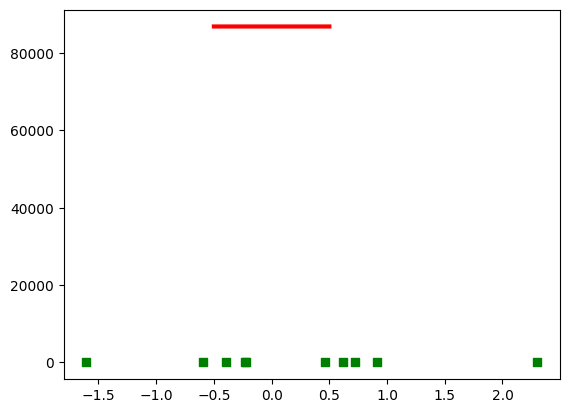

In [17]:
mu_t = model['mu_t']
sig2_t = model['sig2_t']

h = []
if bVerbose:
    a = np.array([[1, -0.5], [1, 0.5]])
    b_plot = -np.dot(a, model['w'][0:2]) / model['w'][2]
    h1 = plt.plot(a, b_plot, 'r', linewidth=3)
    gx, _ = calculate_gx(px, model['w'])
    h2 = plt.scatter(x[gx >= 0, 0], x[gx >= 0, 1], color='g', marker='s')
    h = [h2, h1]
    plt.show()

In [20]:
h2.show()

AttributeError: 'PathCollection' object has no attribute 'show'

In [167]:
nw = np.linalg.norm(w)
w = w / nw
nIter = 100

phi_xt = np.dot(np.hstack(([1], pxt[0])), w)
w = w * np.sign(phi_xt)
gx, phi_x = calculate_gx(px, w)

r = gx >= 0

In [168]:
r.shape

(10, 1)

In [106]:
k = 1
ms = np.mean(y[r])

In [108]:
logtheta = minimize(loglikelihood, logtheta, args=(covSum, [covSEard, covNoise], x[r,:], y[r,:] - ms), options={'maxiter': nIter}).x

IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed

In [177]:
r1 = r.flatten()
ms = np.mean(y[r1]).item()
logtheta = minimize(loglikelihood, logtheta, args=(covSum, [covSEard, covNoise], x[r1,:], y[r] - ms), options={'maxiter': nIter}).x

In [178]:
logtheta.shape, r.shape

((5,), (10, 1))

In [179]:
r

array([[ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True]])

In [180]:
K = covSum([covSEard, covNoise], logtheta, x[r1,:])
_, Kt = covSum([covSEard, covNoise], logtheta, x[r1,:], x)

In [203]:
L = cholesky(K, lower=True)
Ly = np.linalg.solve(L, y[r1] - ms)
LK = np.linalg.solve(L, Kt)
fs = np.dot(LK.T, Ly) + ms

sigma = np.sqrt(np.mean((y[r1] - fs[r1]) ** 2)).item()

like = norm.pdf(y, loc=fs, scale=sigma)
RR = norm.pdf(2.5 * sigma, loc=0, scale=sigma)
prior_z = 1 / (1 + np.exp(-0.05 * nw * gx))
prior_z = prior_z.reshape(-1,1)
pos_z = prior_z * like / (prior_z * like + (1 - prior_z) * RR)

In [204]:
pos_z.shape

(10, 1)

In [171]:
K = covSum([covSEard, covNoise], logtheta, x[r1,:])
_, Kt = covSum([covSEard, covNoise], logtheta, x[r1,:], x)
L = cholesky(K, lower=True)
Ly = np.linalg.solve(L, y[r1] - ms)
LK = np.linalg.solve(L, Kt)
fs = np.dot(LK.T, Ly) + ms

sigma = np.sqrt(np.mean((y[r1] - fs[r1]) ** 2))

like = norm.pdf(y, loc=fs, scale=sigma)
RR = norm.pdf(2.5 * sigma, loc=0, scale=sigma)
prior_z = 1 / (1 + np.exp(-0.05 * nw * gx))
pos_z = prior_z * like / (prior_z * like + (1 - prior_z) * RR)

r = pos_z >= 0.5

In [172]:
r.shape

(10, 1)

In [173]:
def wfun(wo):
    phi_w = np.dot(phi_x, wo)
    return -np.sum(r * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r) * np.log(1 - 1 / (1 + np.exp(-phi_w))))

w_flattened = w.ravel()
w_new = minimize(wfun, w_flattened, bounds=[(-np.inf, np.inf)], method='SLSQP').x
# w_new = w_new.reshape(w.shape)
conv_crit = np.linalg.norm(w_new / np.linalg.norm(w_new) - w / np.linalg.norm(w))

In [174]:
w = w_new
nw = np.linalg.norm(w)
w = w / nw
gx, phi_x = calculate_gx(px, w)

In [175]:
conv_crit, r.shape

(np.float64(2.0732025991822853), (10, 1))

In [176]:
r

array([[ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True]])

In [205]:
import numpy as np
from scipy.optimize import minimize
from scipy.linalg import cholesky
from scipy.stats import norm

if bVerbose:
    print("Initial boundary visualization")
# r1 = r.flatten()

err_flag = False
for k in range(10):
    r1 = r.flatten()
    ms = np.mean(y[r1]).item()
    try:
        logtheta = minimize(loglikelihood, logtheta, args=(covSum, [covSEard, covNoise], x[r1,:], y[r1] - ms), options={'maxiter': nIter}).x
    except:
        print("we fail!")
        err_flag = True

    K = covSum([covSEard, covNoise], logtheta, x[r1,:])
    _, Kt = covSum([covSEard, covNoise], logtheta, x[r1,:], x)
    L = cholesky(K, lower=True)
    Ly = np.linalg.solve(L, y[r1] - ms)
    LK = np.linalg.solve(L, Kt)
    fs = np.dot(LK.T, Ly) + ms
    
    sigma = np.sqrt(np.mean((y[r1] - fs[r1]) ** 2))
    
    like = norm.pdf(y, loc=fs, scale=sigma)
    RR = norm.pdf(2.5 * sigma, loc=0, scale=sigma)
    prior_z = 1 / (1 + np.exp(-0.05 * nw * gx))
    prior_z = prior_z.reshape(-1,1)
    pos_z = prior_z * like / (prior_z * like + (1 - prior_z) * RR)
    
    r = pos_z >= 0.5
    print(f"the {k}th r: {r.shape}")
    # r1 = r.flatten()
    
    def wfun(wo):
        phi_w = np.dot(phi_x, wo)
        return -np.sum(r * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r) * np.log(1 - 1 / (1 + np.exp(-phi_w))))

    w_flattened = w.ravel()
    w_new = minimize(wfun, w_flattened, bounds=[(-np.inf, np.inf)], method='SLSQP').x
    # w_new = w_new.reshape(w.shape)
    conv_crit = np.linalg.norm(w_new / np.linalg.norm(w_new) - w / np.linalg.norm(w))
    if conv_crit < 1e-3:
        break
    
    w = w_new
    nw = np.linalg.norm(w)
    w = w / nw
    gx, phi_x = calculate_gx(px, w)
    
    if err_flag:
        break

Initial boundary visualization
the 0th r: (10, 1)


In [208]:
conv_crit

np.float64(5.898508254695473e-05)

In [121]:
r1 = r.flatten()
K = covSum([covSEard, covNoise], logtheta, x[r1,:])
Ktt, Kt = covSum([covSEard, covNoise], logtheta, x[r1,:], xt)
L = cholesky(K, lower=True)
Ly = np.linalg.solve(L, y[r1] - ms)
LK = np.linalg.solve(L, Kt)
fs = np.dot(LK.T, Ly) + ms

IndexError: boolean index did not match indexed array along axis 0; size of axis is 10 but size of corresponding boolean axis is 100

In [101]:
y.shape, r.shape

((10, 1), (100,))

C:\Users\yxu59\AppData\Local\miniconda3\envs\jumpGP\Lib\site-packages\numpy\_core\fromnumeric.py:4318: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\yxu59\AppData\Local\miniconda3\envs\jumpGP\Lib\site-packages\numpy\_core\_methods.py:184: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
C:\Users\yxu59\AppData\Local\miniconda3\envs\jumpGP\Lib\site-packages\numpy\_core\_methods.py:219: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Initial boundary visualization


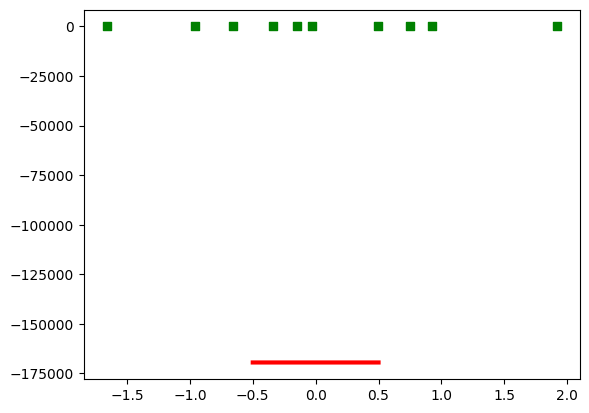

(array([[0.46237351]]),
 array([[0.11751283]]),
 {'x': array([[-0.03284968,  0.22168007,  0.2225619 ],
         [ 0.7477727 ,  0.23961766,  0.32710535],
         [ 0.92652751,  1.19890015,  0.53697486],
         [ 0.49424802,  0.1102763 ,  0.54094086],
         [-1.66297502, -0.6169951 ,  1.39268528],
         [-0.95821822,  1.21333831, -1.5114233 ],
         [-0.33577323, -0.76387377, -0.27125027],
         [ 1.92250426,  0.36802816,  0.41819192],
         [-0.15096285,  0.75064291, -1.32148873],
         [-0.65625162, -0.56295561, -0.91462467]]),
  'y': array([[ 0.75416262],
         [ 0.35501328],
         [-0.01472433],
         [-0.76448794],
         [-0.65342425],
         [ 0.16155886],
         [-0.90655856],
         [-0.24081729],
         [-0.46122135],
         [-1.07887633]]),
  'RR': np.float64(43142407.56355508),
  'fs': array([[0.46237351]]),
  'sigma': np.float64(4.062893446024492e-10),
  'xt': array([[0.91235536, 0.40260461, 0.04987035]]),
  'px': array([[-0.03284968

In [3]:
JumpGP_LD(x, y, x0, 'CEM', bVerbose=True)

## Figure_3_4_5_6

In [20]:
percent_train = 0.5
sig = 2

# Choose case number for Figures 3, 4, 5, and 6
caseno = 1  # For Figure 3
# caseno = 2  # For Figure 4
# caseno = 3  # For Figure 5
# caseno = 4  # For Figure 6

# Simulate case
x, y, xt, yt, y0, gx, r, bw = simulate_case(caseno, sig, percent_train)

L = len(gx)
# Example of saving data (if needed):
# np.savetxt('phantom41.csv', np.reshape(y0, (L, L)))
# np.savetxt('phantom41_noisy.csv', np.reshape(yt, (L, L)))
# np.savetxt('phantom41_J.csv', np.reshape(bw, (L, L)))

my = np.mean(yt)
y -= my
yt -= my
y0 -= my

In [21]:
bw = np.reshape(bw, (L, L))
sc = 0.025 / 0.02

# Define test points for different cases
if caseno == 1:
    xs = np.array([[20, 33], [16, 16], [7, 5], [25, 36], [8, 32], [38, 18]])
elif caseno == 2:
    xs = np.array([[7, 22], [17, 22], [35, 22], [5, 28], [22, 35], [31, 7]])
elif caseno == 3:
    xs = np.array([[37, 11], [17, 24], [21, 21], [36, 36], [8, 35], [34, 32]])
elif caseno == 4:
    xs = np.array([[37, 11], [36, 36], [8, 35], [17, 24], [21, 21], [34, 32]])

# Normalize test points
xs = xs / len(np.arange(0, 1.025, 0.025)) - 0.5

# Plotting configuration
Nt = xs.shape[0]
subplot_layout = (2, 4)
sel = [0, 1, 2, 5]  # Index selection for test points
loc = list(range(1, 9))

In [22]:
def check_and_reshape(x, D):
    # 检查 x 的形状是否是 (任意, D)
    if len(x.shape) != 2 or x.shape[1] != D:
        # 如果不是，重塑为 (-1, D)
        x = x.reshape(-1, D)
    return x

# n, D = x.shape
# y, xt = check_and_reshape(y, 1), check_and_reshape(xt, D)

In [7]:
subplot_layout[0]+1, subplot_layout[1]

(3, 4)

C:\Users\yxu59\AppData\Local\miniconda3\envs\jumpGP\Lib\site-packages\numpy\_core\fromnumeric.py:4318: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\yxu59\AppData\Local\miniconda3\envs\jumpGP\Lib\site-packages\numpy\_core\_methods.py:184: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
C:\Users\yxu59\AppData\Local\miniconda3\envs\jumpGP\Lib\site-packages\numpy\_core\_methods.py:219: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: divide by zero encountered in log
  return -np.sum(r * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r) * np.log(1 - 1 / (1 + np.exp(-phi_w))))
C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: invalid value encountered in multiply
  return -np.sum(r * np.log(1 /

Initial boundary visualization


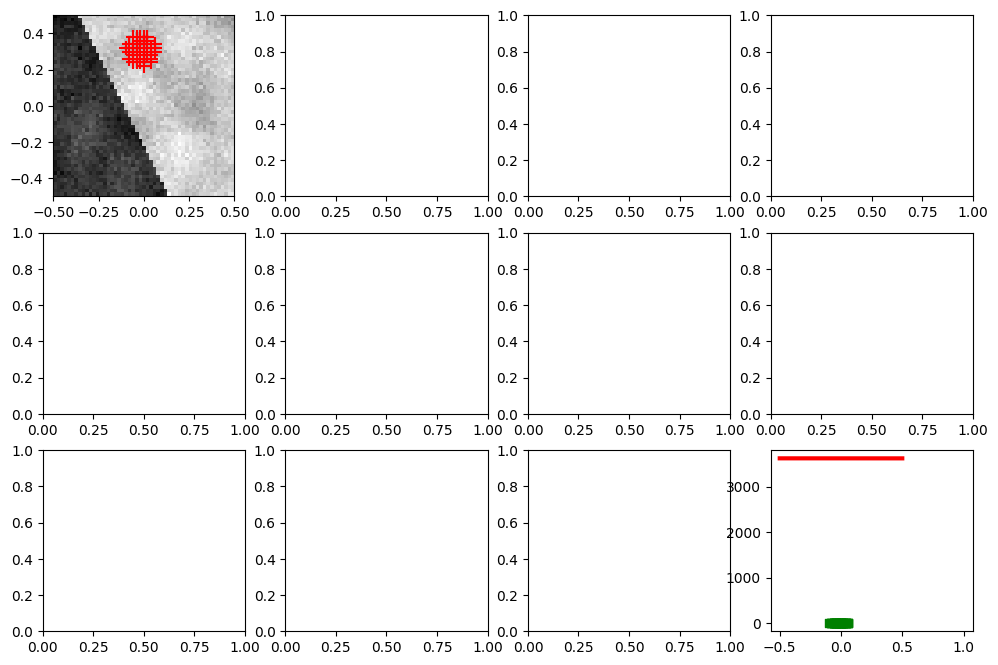

Initial boundary visualization
we fail at iteration 0


C:\Users\yxu59\AppData\Local\miniconda3\envs\jumpGP\Lib\site-packages\numpy\_core\fromnumeric.py:4318: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\yxu59\AppData\Local\miniconda3\envs\jumpGP\Lib\site-packages\numpy\_core\_methods.py:184: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
C:\Users\yxu59\AppData\Local\miniconda3\envs\jumpGP\Lib\site-packages\numpy\_core\_methods.py:219: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: divide by zero encountered in log
  return -np.sum(r * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r) * np.log(1 - 1 / (1 + np.exp(-phi_w))))
C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: invalid value encountered in multiply
  return -np.sum(r * np.log(1 /

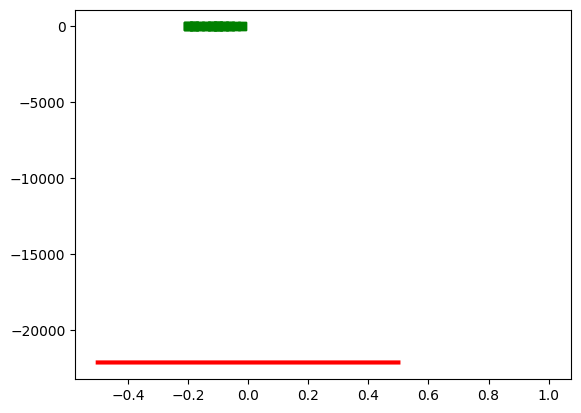

C:\Users\yxu59\AppData\Local\miniconda3\envs\jumpGP\Lib\site-packages\numpy\_core\fromnumeric.py:4318: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\yxu59\AppData\Local\miniconda3\envs\jumpGP\Lib\site-packages\numpy\_core\_methods.py:184: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
C:\Users\yxu59\AppData\Local\miniconda3\envs\jumpGP\Lib\site-packages\numpy\_core\_methods.py:219: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Initial boundary visualization


C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: divide by zero encountered in log
  return -np.sum(r * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r) * np.log(1 - 1 / (1 + np.exp(-phi_w))))
C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: invalid value encountered in multiply
  return -np.sum(r * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r) * np.log(1 - 1 / (1 + np.exp(-phi_w))))


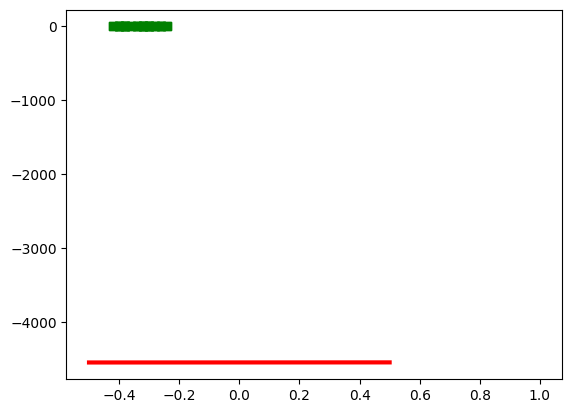

C:\Users\yxu59\AppData\Local\miniconda3\envs\jumpGP\Lib\site-packages\numpy\_core\fromnumeric.py:4318: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\yxu59\AppData\Local\miniconda3\envs\jumpGP\Lib\site-packages\numpy\_core\_methods.py:184: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
C:\Users\yxu59\AppData\Local\miniconda3\envs\jumpGP\Lib\site-packages\numpy\_core\_methods.py:219: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: divide by zero encountered in log
  return -np.sum(r * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r) * np.log(1 - 1 / (1 + np.exp(-phi_w))))
C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: invalid value encountered in multiply
  return -np.sum(r * np.log(1 /

Initial boundary visualization


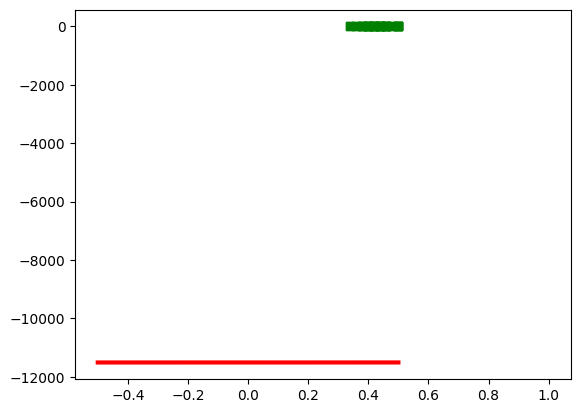

<Figure size 640x480 with 0 Axes>

In [6]:
fig, ax = plt.subplots(subplot_layout[0]+1, subplot_layout[1], figsize=(12, 8))
ax = ax.flatten()

n, D = x.shape
for j in range(4):
    ax[j].imshow(np.reshape(yt, (L, L)), cmap='gray', extent=(gx[0], gx[-1], gx[0], gx[-1]))
    
    i = sel[j % 4]  # Choose test point index
    xt = xs[i, :]
    
    # Find 40 nearest neighbors
    nbrs = NearestNeighbors(n_neighbors=40).fit(x)
    distances, idx = nbrs.kneighbors([xt])
    lx = x[idx[0], :]
    ly = y[idx[0]]

    ly, xt = check_and_reshape(ly, 1), check_and_reshape(xt, D)
    # Plot neighborhood
    ax[j].scatter(lx[:, 0], lx[:, 1], color='r', marker='+', s=100, label='Local Training Inputs')
    
    if j < 4:
        # CEM method
        mu_t, sig2_t, model, h3 = JumpGP_LD(lx, ly, xt, mode='CEM', bVerbose=True)
    else:
        # VEM method
        mu_t, sig2_t, model, h3 = JumpGP_LD(lx, ly, xt, mode='VEM', bVerbose=True)

    # Plot test point
    ax[j].scatter(xt[0,0], xt[0,1], color='c', marker='o', s=100, label='Test Point')

# Set axis labels
for i in range(4):
    ax[i].set_xlabel('x1')
    ax[i].set_ylabel('x2')

# Set legends in the second row
if j == 5:
    fig.legend(['Test Point', 'Local Training Inputs', 'Selected Local Design'], loc='lower center')

plt.tight_layout()
plt.show()

In [9]:
h3[1]

In [11]:
ly.shape

(40,)

In [5]:
xt1 = xt.reshape(1,-1)
ly1 = ly.reshape(-1, 1)
JumpGP_LD(lx, ly1, xt1, 'CEM', bVerbose=True)

NameError: name 'xt' is not defined

In [ ]:
print_mat({"lx":lx,"ly":ly,"xt":xt})

In [22]:
mu_t, sig2_t, model, h3 = JumpGP_LD(lx, ly, xt, mode='CEM', bVerbose=True)

ValueError: All-NaN slice encountered

C:\Users\yxu59\AppData\Local\miniconda3\envs\jumpGP\Lib\site-packages\numpy\_core\fromnumeric.py:4318: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\yxu59\AppData\Local\miniconda3\envs\jumpGP\Lib\site-packages\numpy\_core\_methods.py:184: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
C:\Users\yxu59\AppData\Local\miniconda3\envs\jumpGP\Lib\site-packages\numpy\_core\_methods.py:219: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: divide by zero encountered in log
  return -np.sum(r * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r) * np.log(1 - 1 / (1 + np.exp(-phi_w))))
C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: invalid value encountered in multiply
  return -np.sum(r * np.log(1 /

Initial boundary visualization


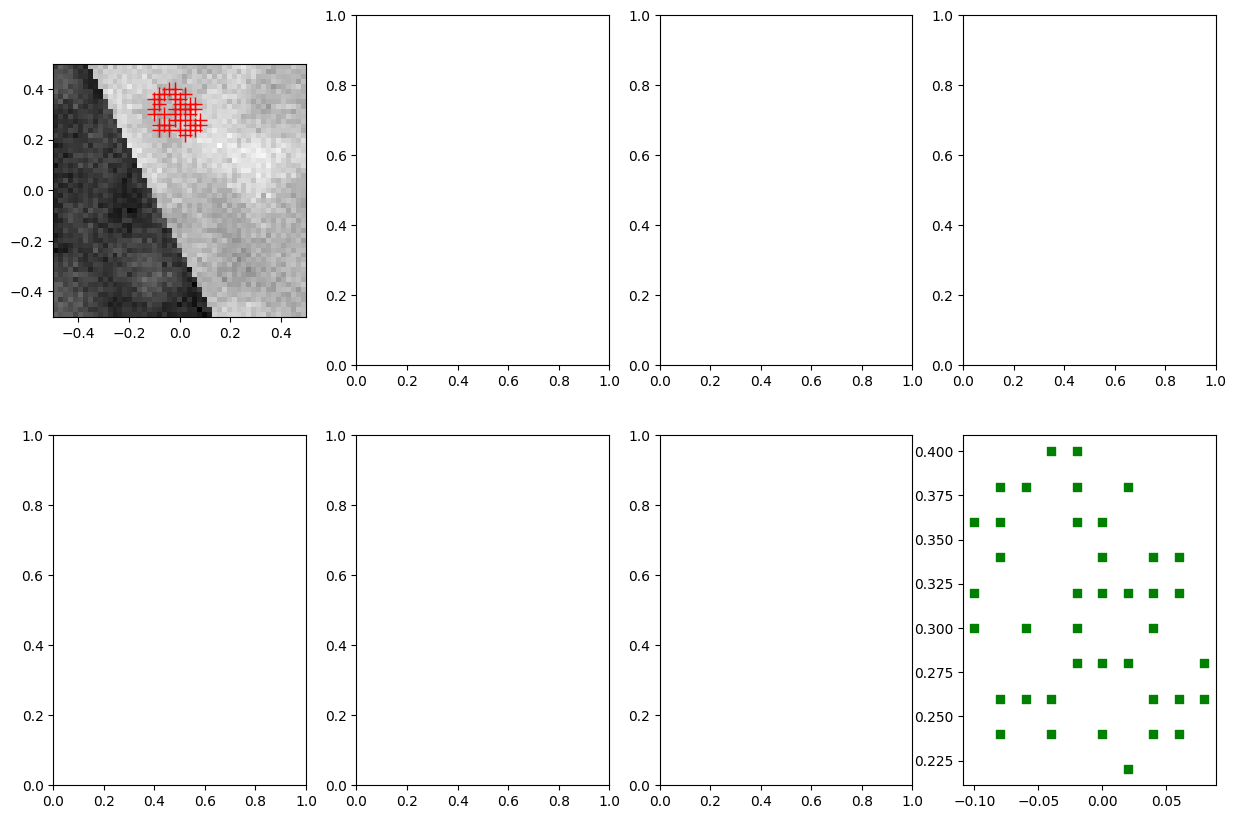

Initial boundary visualization


C:\Users\yxu59\AppData\Local\miniconda3\envs\jumpGP\Lib\site-packages\numpy\_core\fromnumeric.py:4318: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\yxu59\AppData\Local\miniconda3\envs\jumpGP\Lib\site-packages\numpy\_core\_methods.py:184: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
C:\Users\yxu59\AppData\Local\miniconda3\envs\jumpGP\Lib\site-packages\numpy\_core\_methods.py:219: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: divide by zero encountered in log
  return -np.sum(r * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r) * np.log(1 - 1 / (1 + np.exp(-phi_w))))
C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: invalid value encountered in multiply
  return -np.sum(r * np.log(1 /

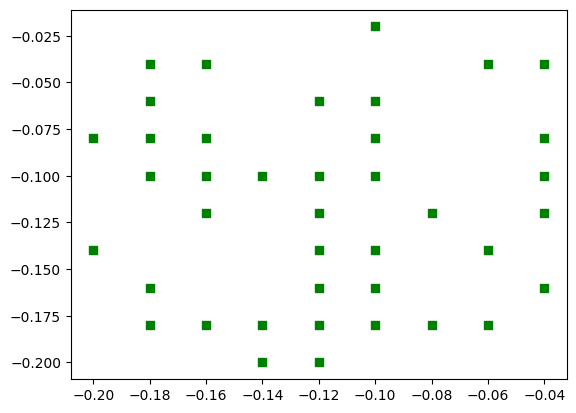

Initial boundary visualization


C:\Users\yxu59\AppData\Local\miniconda3\envs\jumpGP\Lib\site-packages\numpy\_core\fromnumeric.py:4318: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\yxu59\AppData\Local\miniconda3\envs\jumpGP\Lib\site-packages\numpy\_core\_methods.py:184: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
C:\Users\yxu59\AppData\Local\miniconda3\envs\jumpGP\Lib\site-packages\numpy\_core\_methods.py:219: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: divide by zero encountered in log
  return -np.sum(r * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r) * np.log(1 - 1 / (1 + np.exp(-phi_w))))
C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: invalid value encountered in multiply
  return -np.sum(r * np.log(1 /

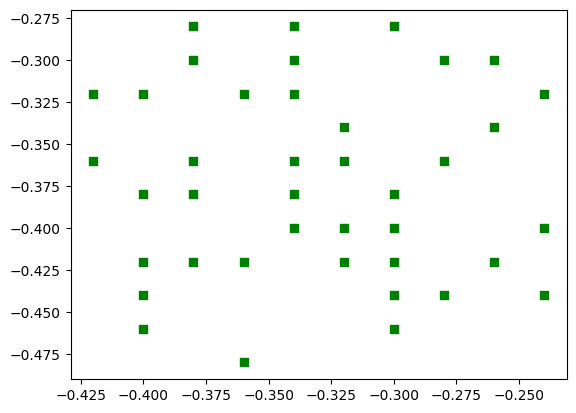

C:\Users\yxu59\AppData\Local\miniconda3\envs\jumpGP\Lib\site-packages\numpy\_core\fromnumeric.py:4318: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\yxu59\AppData\Local\miniconda3\envs\jumpGP\Lib\site-packages\numpy\_core\_methods.py:184: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
C:\Users\yxu59\AppData\Local\miniconda3\envs\jumpGP\Lib\site-packages\numpy\_core\_methods.py:219: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: divide by zero encountered in log
  return -np.sum(r * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r) * np.log(1 - 1 / (1 + np.exp(-phi_w))))
C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: invalid value encountered in multiply
  return -np.sum(r * np.log(1 /

Initial boundary visualization


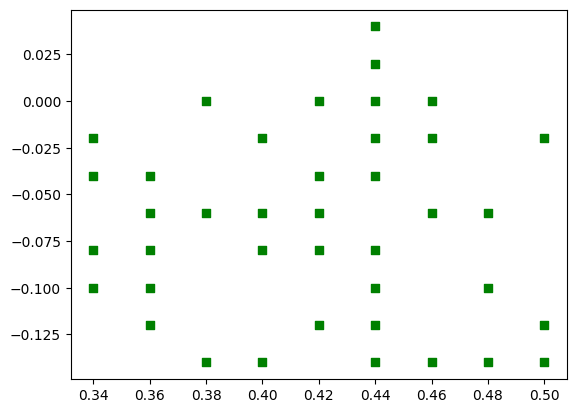

In [14]:
subplot_layout = (2, 4)
sel = [0, 1, 2, 5]  # Adjusting for 0-indexing in Python
loc = list(range(8))
fig, axs = plt.subplots(subplot_layout[0], subplot_layout[1], figsize=(15, 10))

for j in range(4):
    k = 0 if j < 4 else 1
    i = j if k == 0 else j - 4
    ax = axs[j // 4, j % 4]
    xt = xs[sel[i], :]

    # Find nearest neighbors (40 nearest)
    nbrs = NearestNeighbors(n_neighbors=40, algorithm='auto').fit(x)
    idx = nbrs.kneighbors([xt], return_distance=False)[0]
    lx, ly = x[idx, :], y[idx]
    ly, xt = check_and_reshape(ly, 1), check_and_reshape(xt, D)

    # Plotting
    ax.imshow(np.reshape(yt, (L, L)), extent=[gx.min(), gx.max(), gx.min(), gx.max()], cmap='gray')
    ax.plot(lx[:, 0], lx[:, 1], 'r+', markersize=10)

    # Select JumpGP function based on k
    if k == 0:
        mu_t, sig2_t, model, h3 = JumpGP_LD(lx, ly, xt, 'CEM', True)
    else:
        mu_t, sig2_t, model, h3 = JumpGP_LD(lx, ly, xt, 'VEM', True)

    ax.scatter(xt[0,0], xt[0,1], color='c', s=100, zorder=5)

    if i == 0 and k == 0:
        ax.set_xlabel('x1')
        ax.set_ylabel('x2')

# Legend handling (lower subplot, shared)
# axs[-1, -1].axis('off')
# fig.legend(['Test point', 'Local training inputs', 'Selected local design'], loc='lower center', ncol=3)

# # Titles (annotations equivalent to MATLAB annotations)
# fig.suptitle('Figure 3, 4, 5, 6 Results', fontsize=16)

# plt.tight_layout()
plt.show()

C:\Users\yxu59\AppData\Local\miniconda3\envs\jumpGP\Lib\site-packages\numpy\_core\fromnumeric.py:4318: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\yxu59\AppData\Local\miniconda3\envs\jumpGP\Lib\site-packages\numpy\_core\_methods.py:184: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
C:\Users\yxu59\AppData\Local\miniconda3\envs\jumpGP\Lib\site-packages\numpy\_core\_methods.py:219: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: divide by zero encountered in log
  return -np.sum(r * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r) * np.log(1 - 1 / (1 + np.exp(-phi_w))))
C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: invalid value encountered in multiply
  return -np.sum(r * np.log(1 /

Initial boundary visualization


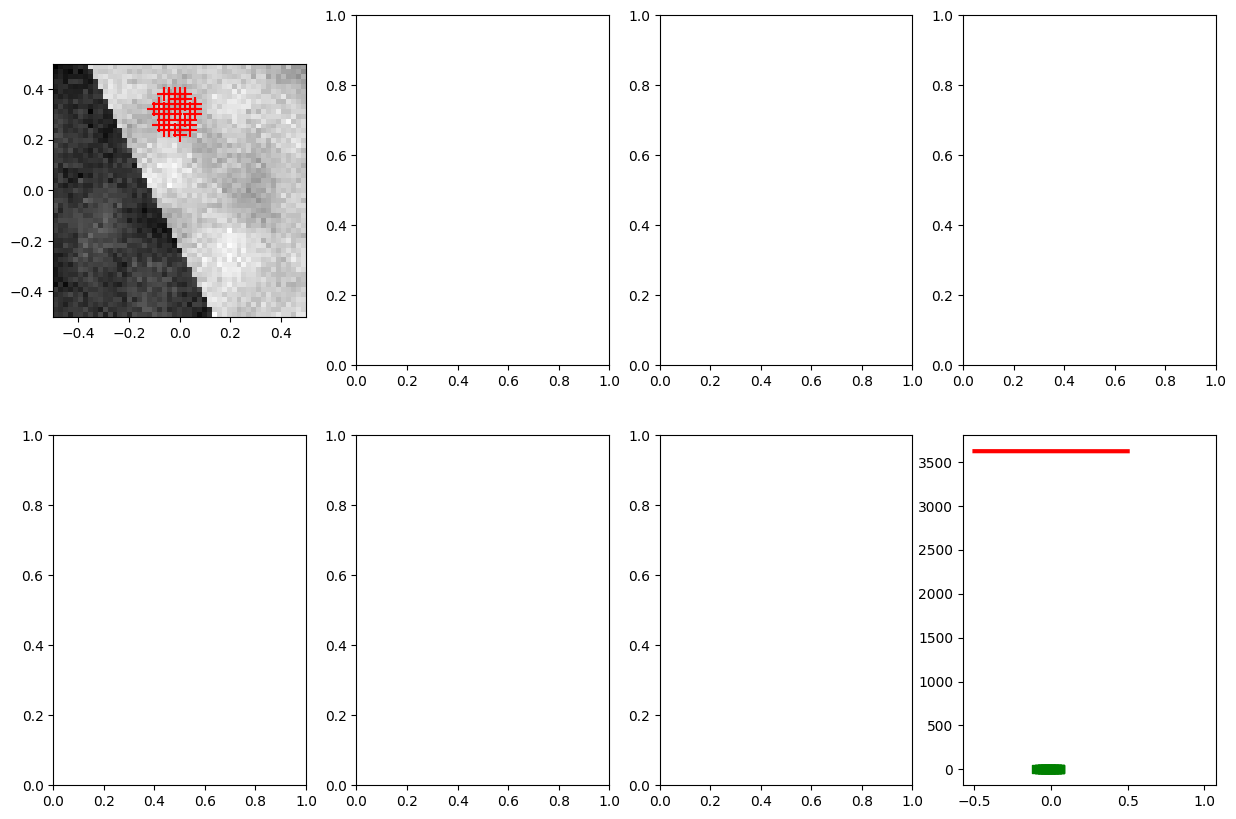

Initial boundary visualization
we fail at iteration 0


C:\Users\yxu59\AppData\Local\miniconda3\envs\jumpGP\Lib\site-packages\numpy\_core\fromnumeric.py:4318: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\yxu59\AppData\Local\miniconda3\envs\jumpGP\Lib\site-packages\numpy\_core\_methods.py:184: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
C:\Users\yxu59\AppData\Local\miniconda3\envs\jumpGP\Lib\site-packages\numpy\_core\_methods.py:219: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: divide by zero encountered in log
  return -np.sum(r * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r) * np.log(1 - 1 / (1 + np.exp(-phi_w))))
C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: invalid value encountered in multiply
  return -np.sum(r * np.log(1 /

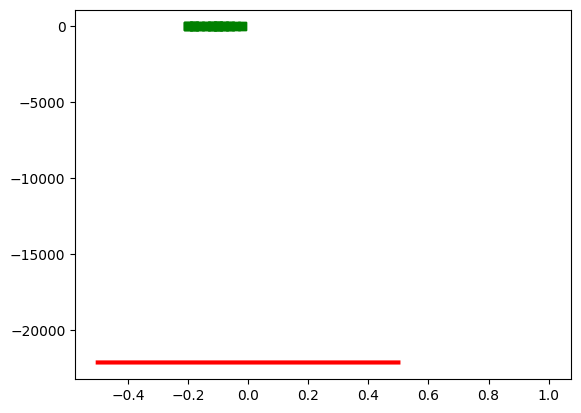

C:\Users\yxu59\AppData\Local\miniconda3\envs\jumpGP\Lib\site-packages\numpy\_core\fromnumeric.py:4318: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\yxu59\AppData\Local\miniconda3\envs\jumpGP\Lib\site-packages\numpy\_core\_methods.py:184: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
C:\Users\yxu59\AppData\Local\miniconda3\envs\jumpGP\Lib\site-packages\numpy\_core\_methods.py:219: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: divide by zero encountered in log
  return -np.sum(r * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r) * np.log(1 - 1 / (1 + np.exp(-phi_w))))
C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: invalid value encountered in multiply
  return -np.sum(r * np.log(1 /

Initial boundary visualization


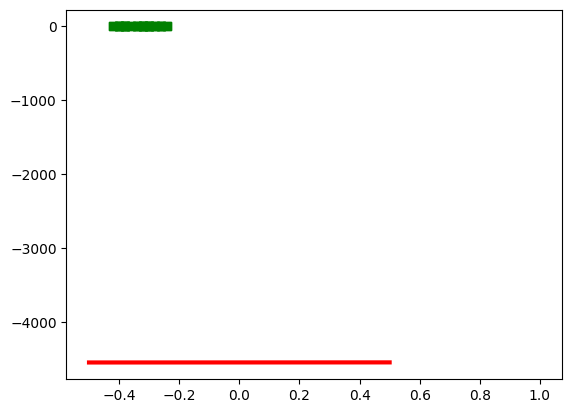

C:\Users\yxu59\AppData\Local\miniconda3\envs\jumpGP\Lib\site-packages\numpy\_core\fromnumeric.py:4318: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\yxu59\AppData\Local\miniconda3\envs\jumpGP\Lib\site-packages\numpy\_core\_methods.py:184: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
C:\Users\yxu59\AppData\Local\miniconda3\envs\jumpGP\Lib\site-packages\numpy\_core\_methods.py:219: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: divide by zero encountered in log
  return -np.sum(r * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r) * np.log(1 - 1 / (1 + np.exp(-phi_w))))
C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: invalid value encountered in multiply
  return -np.sum(r * np.log(1 /

Initial boundary visualization


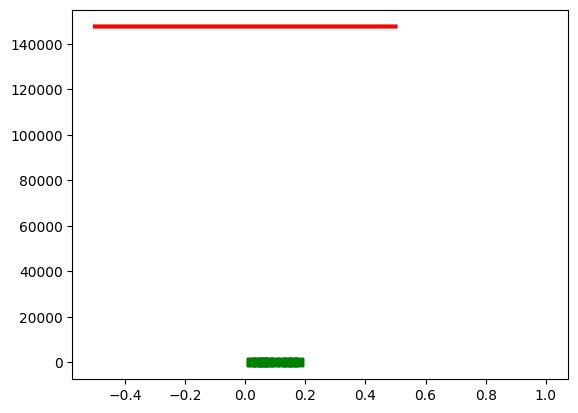

<Figure size 640x480 with 0 Axes>

In [19]:
subplot_layout = (2, 4)
sel = [0, 1, 2, 5]  # Adjusting for 0-indexing in Python
loc = list(range(8))
fig, axs = plt.subplots(subplot_layout[0], subplot_layout[1], figsize=(15, 10))

for j in range(4):
    k = 0 if j < 4 else 1
    i = j if k == 0 else j - 4
    ax = axs[j // 4, j % 4]
    xt = xs[j, :]  # 每个子图的测试点

    # 查找最近的邻居 (40个最近的)
    nbrs = NearestNeighbors(n_neighbors=40, algorithm='auto').fit(x)
    idx = nbrs.kneighbors([xt], return_distance=False)[0]
    lx, ly = x[idx, :], y[idx]
    ly = ly.reshape(-1, 1)  # 可能需要reshape，确保形状一致
    xt = xt.reshape(1, -1)  # 重新reshape测试点

    # 绘制图像
    ax.imshow(np.reshape(yt, (L, L)), extent=[gx.min(), gx.max(), gx.min(), gx.max()], cmap='gray')

    # 绘制局部训练点
    ax.scatter(lx[:, 0], lx[:, 1], color='r', marker='+', s=100, label='Local Training Inputs')

    # 选择JumpGP函数
    if k == 0:
        mu_t, sig2_t, model, h3 = JumpGP_LD(lx, ly, xt, 'CEM', True)
    else:
        mu_t, sig2_t, model, h3 = JumpGP_LD(lx, ly, xt, 'VEM', True)

    # 绘制测试点
    ax.scatter(xt[0, 0], xt[0, 1], color='c', marker='o', s=100, label='Test Point', zorder=5)

    # 复制h3中的艺术家对象到当前轴
    def copy_path_collection(artist, ax):
        offsets = artist.get_offsets()  # 获取点的坐标
        sizes = artist.get_sizes()  # 获取点的大小
        facecolors = artist.get_facecolor()  # 获取点的颜色
        edgecolors = artist.get_edgecolor()  # 获取边缘颜色

        # 重新绘制散点图
        return ax.scatter(offsets[:, 0], offsets[:, 1], s=sizes, c=facecolors,
                          edgecolor=edgecolors, alpha=artist.get_alpha(), label=artist.get_label())

    # 重新绘制h3的散点（假设h3[0]是PathCollection对象）
    if h3[0] is not None:
        copy_path_collection(h3[0], ax)

    # 绘制h3的线条
    # if len(h3) > 1 and len(h3[1]) > 0:
    #     for line in h3[1]:
    #         ax.plot(line.get_xdata(), line.get_ydata(),
    #                 color=line.get_color(), linewidth=line.get_linewidth(),
    #                 label=line.get_label())

    # 设置标签
    if i == 0 and k == 0:
        ax.set_xlabel('x1')
        ax.set_ylabel('x2')

# 图例处理
fig.legend(loc='lower center', ncol=3)

# 标题
fig.suptitle('Figure 3, 4, 5, 6 Results', fontsize=16)

plt.tight_layout()
plt.show()


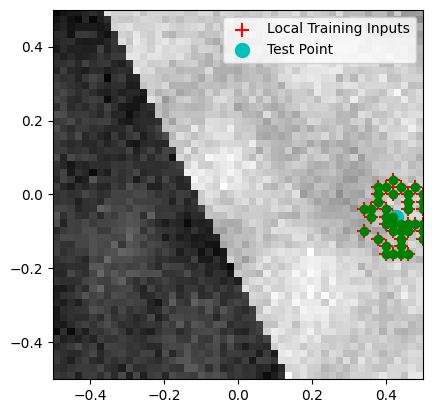

In [17]:
plt.imshow(np.reshape(yt, (L, L)), cmap='gray', extent=(gx[0], gx[-1], gx[0], gx[-1]))

# 绘制局部训练点
plt.scatter(lx[:, 0], lx[:, 1], color='r', marker='+', s=100, label='Local Training Inputs')

# 绘制测试点
plt.scatter(xt[0,0], xt[0,1], color='c', marker='o', s=100, label='Test Point')

current_ax = plt.gca()

# 函数用于复制 PathCollection
def copy_path_collection(artist, ax):
    # 获取 PathCollection 的属性
    offsets = artist.get_offsets()  # 获取点的坐标
    sizes = artist.get_sizes()  # 获取点的大小
    facecolors = artist.get_facecolor()  # 获取点的颜色
    edgecolors = artist.get_edgecolor()  # 获取边缘颜色

    # 重新绘制散点图
    return ax.scatter(offsets[:, 0], offsets[:, 1], s=sizes, c=facecolors, 
                      edgecolor=edgecolors, alpha=artist.get_alpha(), label=artist.get_label())

# 重新绘制 h3
new_artist = copy_path_collection(h3[0], current_ax)
# line = h3[1][1]
# current_ax.plot(line.get_xdata(), line.get_ydata(),
#                 color=line.get_color(), linewidth=line.get_linewidth(),
#                 label=line.get_label())

# 添加图例
plt.legend()
plt.show()

In [6]:
gx

array([-0.5 , -0.48, -0.46, -0.44, -0.42, -0.4 , -0.38, -0.36, -0.34,
       -0.32, -0.3 , -0.28, -0.26, -0.24, -0.22, -0.2 , -0.18, -0.16,
       -0.14, -0.12, -0.1 , -0.08, -0.06, -0.04, -0.02,  0.  ,  0.02,
        0.04,  0.06,  0.08,  0.1 ,  0.12,  0.14,  0.16,  0.18,  0.2 ,
        0.22,  0.24,  0.26,  0.28,  0.3 ,  0.32,  0.34,  0.36,  0.38,
        0.4 ,  0.42,  0.44,  0.46,  0.48,  0.5 ])

Initial boundary visualization


C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: divide by zero encountered in log
  return -np.sum(r.T * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r).T * np.log(1 - 1 / (1 + np.exp(-phi_w))) )
C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: invalid value encountered in multiply
  return -np.sum(r.T * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r).T * np.log(1 - 1 / (1 + np.exp(-phi_w))) )
C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: divide by zero encountered in log
  return -np.sum(r.T * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r).T * np.log(1 - 1 / (1 + np.exp(-phi_w))) )
C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: invalid value encountered in multiply
  return -np.sum(r.T * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r).T * np.log(1 - 1 / (1 + np.exp(-phi_w))) )
C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarn

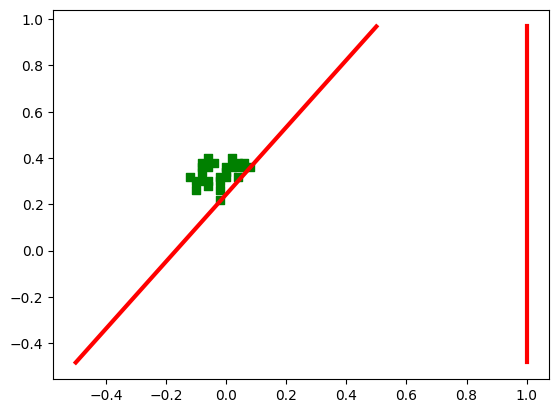

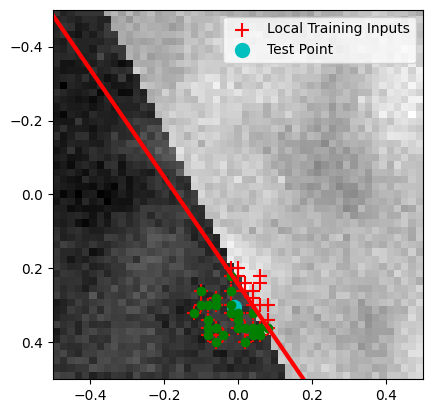

Initial boundary visualization


C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: divide by zero encountered in log
  return -np.sum(r.T * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r).T * np.log(1 - 1 / (1 + np.exp(-phi_w))) )
C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: invalid value encountered in multiply
  return -np.sum(r.T * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r).T * np.log(1 - 1 / (1 + np.exp(-phi_w))) )
C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: divide by zero encountered in log
  return -np.sum(r.T * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r).T * np.log(1 - 1 / (1 + np.exp(-phi_w))) )
C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: invalid value encountered in multiply
  return -np.sum(r.T * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r).T * np.log(1 - 1 / (1 + np.exp(-phi_w))) )
C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarn

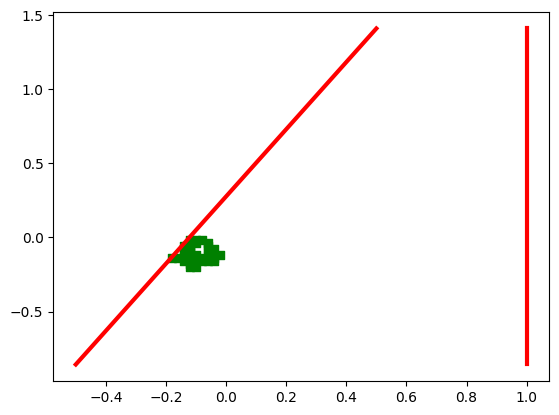

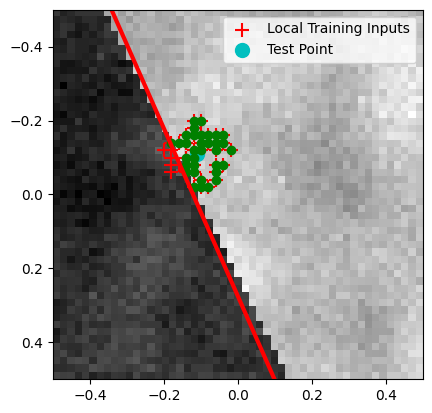

Initial boundary visualization


C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: divide by zero encountered in log
  return -np.sum(r.T * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r).T * np.log(1 - 1 / (1 + np.exp(-phi_w))) )
C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: invalid value encountered in multiply
  return -np.sum(r.T * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r).T * np.log(1 - 1 / (1 + np.exp(-phi_w))) )
C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: divide by zero encountered in log
  return -np.sum(r.T * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r).T * np.log(1 - 1 / (1 + np.exp(-phi_w))) )
C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: invalid value encountered in multiply
  return -np.sum(r.T * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r).T * np.log(1 - 1 / (1 + np.exp(-phi_w))) )


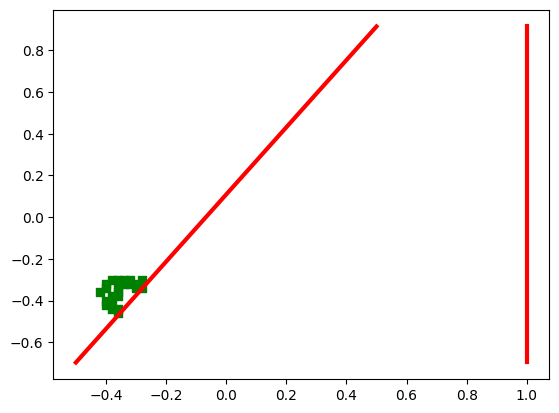

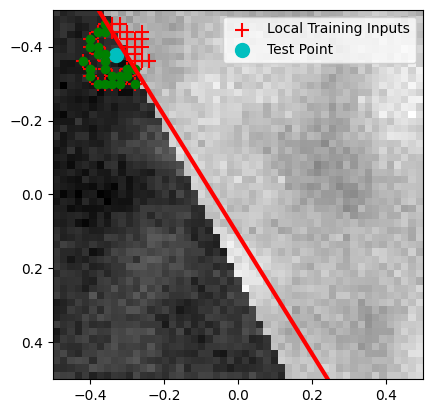

Initial boundary visualization


C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: divide by zero encountered in log
  return -np.sum(r.T * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r).T * np.log(1 - 1 / (1 + np.exp(-phi_w))) )
C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: invalid value encountered in multiply
  return -np.sum(r.T * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r).T * np.log(1 - 1 / (1 + np.exp(-phi_w))) )
C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: divide by zero encountered in log
  return -np.sum(r.T * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r).T * np.log(1 - 1 / (1 + np.exp(-phi_w))) )
C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: invalid value encountered in multiply
  return -np.sum(r.T * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r).T * np.log(1 - 1 / (1 + np.exp(-phi_w))) )
C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarn

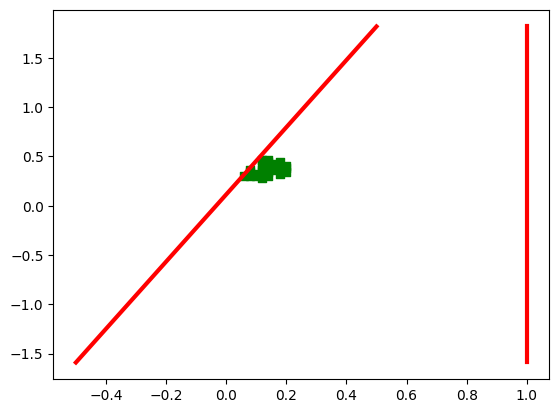

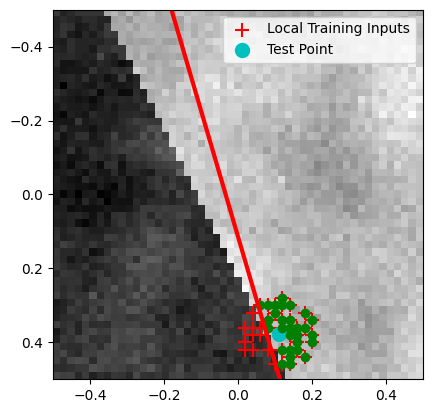

In [38]:
for j in range(4):
    k = 0 if j < 4 else 1
    i = j if k == 0 else j - 4
    # ax = axs[j // 4, j % 4]
    xt = xs[j, :]  # 每个子图的测试点

    # 查找最近的邻居 (40个最近的)
    nbrs = NearestNeighbors(n_neighbors=40, algorithm='auto').fit(x)
    idx = nbrs.kneighbors([xt], return_distance=False)[0]
    lx, ly = x[idx, :], y[idx]
    ly = ly.reshape(-1, 1)  # 可能需要reshape，确保形状一致
    xt = xt.reshape(1, -1)  # 重新reshape测试点

    if k == 0:
        mu_t, sig2_t, model, h3 = JumpGP_LD(lx, ly, xt, 'CEM', True)
    else:
        mu_t, sig2_t, model, h3 = JumpGP_LD(lx, ly, xt, 'VEM', True)

    plt.imshow(np.reshape(yt, (L, L)), cmap='gray', extent=(gx[0], gx[-1], gx[-1], gx[0]))
    
    # 绘制局部训练点
    plt.scatter(lx[:, 0], lx[:, 1], color='r', marker='+', s=100, label='Local Training Inputs')
    
    # 绘制测试点
    plt.scatter(xt[0,0], xt[0,1], color='c', marker='o', s=100, label='Test Point')
    
    current_ax = plt.gca()
    
    # 函数用于复制 PathCollection
    def copy_path_collection(artist, ax):
        # 获取 PathCollection 的属性
        offsets = artist.get_offsets()  # 获取点的坐标
        sizes = artist.get_sizes()  # 获取点的大小
        facecolors = artist.get_facecolor()  # 获取点的颜色
        edgecolors = artist.get_edgecolor()  # 获取边缘颜色
    
        # 重新绘制散点图
        return ax.scatter(offsets[:, 0], offsets[:, 1], s=sizes, c=facecolors, 
                          edgecolor=edgecolors, alpha=artist.get_alpha(), label=artist.get_label())
    
    # 重新绘制 h3
    new_artist = copy_path_collection(h3[0], current_ax)
    a = np.array([[1, -0.5], [1, 0.5]])
    b_plot = -np.dot(a, model['w'][0:2]) / model['w'][2]
    # current_ax.plot(a, b_plot, 'r', linewidth=2)
    current_ax.plot(np.array([-0.5,0.5]), b_plot, 'r', linewidth=3)
    # line = h3[1][1]
    # current_ax.plot(line.get_xdata(), line.get_ydata(),
    #                 color=line.get_color(), linewidth=line.get_linewidth(),
    #                 label=line.get_label())
    plt.imshow(np.reshape(yt, (L, L)), cmap='gray', extent=(gx[0], gx[-1], gx[-1], gx[0]))
    # 添加图例
    plt.legend()
    plt.show()

In [35]:
np.clip(b_plot,0.5,-0.5)

array([-0.5, -0.5])

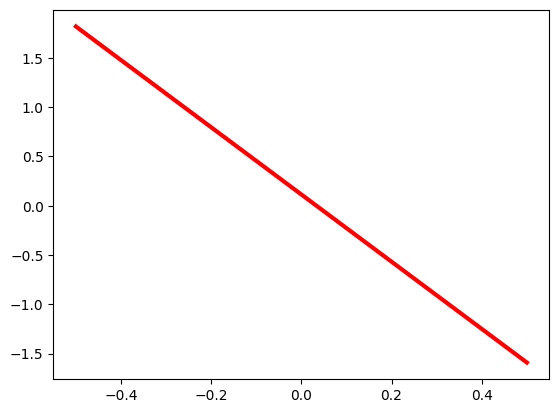

In [27]:
plt.plot(np.array([0.5,-0.5]), b_plot, 'r', linewidth=3)
plt.show()

In [28]:
type(h3[0])

matplotlib.collections.PathCollection

Initial boundary visualization


C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: divide by zero encountered in log
  return -np.sum(r.T * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r).T * np.log(1 - 1 / (1 + np.exp(-phi_w))) )
C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: invalid value encountered in multiply
  return -np.sum(r.T * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r).T * np.log(1 - 1 / (1 + np.exp(-phi_w))) )
C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: divide by zero encountered in log
  return -np.sum(r.T * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r).T * np.log(1 - 1 / (1 + np.exp(-phi_w))) )
C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: invalid value encountered in multiply
  return -np.sum(r.T * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r).T * np.log(1 - 1 / (1 + np.exp(-phi_w))) )
C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarn

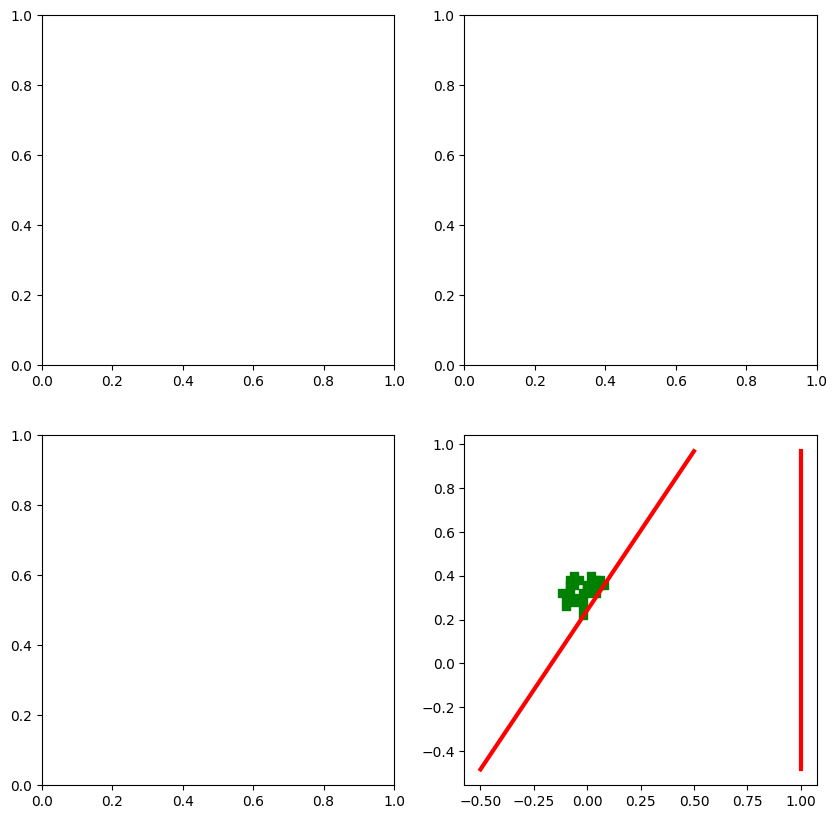

ValueError: x and y must have same first dimension, but have shapes (2,) and (1,)

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

# 假设 JumpGP_LD 和其他数据已经定义
# ...

# 创建一个 2x2 的子图网格
fig, axs = plt.subplots(2, 2, figsize=(10, 10))  # 2行2列，调整figsize以适应图像大小

for j in range(4):
    k = 0 if j < 4 else 1
    i = j if k == 0 else j - 4
    xt = xs[j, :]  # 每个子图的测试点

    # 查找最近的邻居 (40个最近的)
    nbrs = NearestNeighbors(n_neighbors=40, algorithm='auto').fit(x)
    idx = nbrs.kneighbors([xt], return_distance=False)[0]
    lx, ly = x[idx, :], y[idx]
    ly = ly.reshape(-1, 1)  # 可能需要reshape，确保形状一致
    xt = xt.reshape(1, -1)  # 重新reshape测试点

    if k == 0:
        mu_t, sig2_t, model, h3 = JumpGP_LD(lx, ly, xt, 'CEM', True)
    else:
        mu_t, sig2_t, model, h3 = JumpGP_LD(lx, ly, xt, 'VEM', True)

    # 选择子图
    ax = axs[j // 2, j % 2]  # 根据j值选择对应的子图

    # 绘制图像
    ax.imshow(np.reshape(yt, (L, L)), cmap='gray', extent=(gx[0], gx[-1], gx[-1], gx[0]))

    # 绘制局部训练点
    ax.scatter(lx[:, 0], lx[:, 1], color='r', marker='+', s=100, label='Local Training Inputs')

    # 绘制测试点
    ax.scatter(xt[0, 0], xt[0, 1], color='c', marker='o', s=100, label='Test Point')

    # 函数用于复制 PathCollection
    def copy_path_collection(artist, ax):
        # 获取 PathCollection 的属性
        offsets = artist.get_offsets()  # 获取点的坐标
        sizes = artist.get_sizes()  # 获取点的大小
        facecolors = artist.get_facecolor()  # 获取点的颜色
        edgecolors = artist.get_edgecolor()  # 获取边缘颜色
    
        # 重新绘制散点图
        return ax.scatter(offsets[:, 0], offsets[:, 1], s=sizes, c=facecolors, 
                          edgecolor=edgecolors, alpha=artist.get_alpha(), label=artist.get_label())

    # 重新绘制 h3
    new_artist = copy_path_collection(h3[0], ax)
    
    # 调整直线的端点以适应图像的extent
    a = np.array([gx[0], gx[1]])
    b_plot = -np.dot(a, model['w'][0:2]) / model['w'][2]
    ax.plot(a, b_plot, 'r', linewidth=3)
    
    # 添加图例
    ax.legend()

# 调整子图间的间距
plt.tight_layout()

# 显示图像
plt.show()